# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [3]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [4]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    a = x ** 2 * numpy.sin(x)
    return a

Ensure your function works with numpy arrays:

In [5]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [6]:
def g(x):
    '''Analytical integral of f(x).'''
    b = (- x ** 2) * numpy.cos(x) + 2 * x * numpy.sin(x) + 2 * numpy.cos(x) - 2
    return b

Check your solution with the same numpy array:

In [7]:
assert g(0) == 0.

In [8]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [114]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    c = g(xmax) - g(xmin)
    print(c)
    return c

Check your analytic function:

In [115]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

1.0965907296271418


## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [193]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    #this was my first attempt that didn't work but I couldn't understand why
    #dx = (xmax - xmin)/2*N
    #odd = 0
    #even = 0
    #xi = 0
    #for i in range(0, (2 * N)+1):
    #    xi = xmin + (i * dx)
    #    if i < 2*N: 
    #        even += f(xi)
    #    if i % 2 == 0.5:
    #        odd += f(xi)
    #t = 0
    #t = (dx/6) * ( f(xmin) + 4 * odd + 2 * even + f(xmax))
    #print(t)
    #return t
    I_tot_so_far = f(xmin) + f(xmax)
    dx = (xmax - xmin)/N
    #odd points
    i = 1
    a = xmin + dx/2
    while i < 2*N:
        I_tot_so_far = I_tot_so_far + 4*f(a)
        a = a + dx 
        i = i + 2
        
    #even points
    j = 2
    b = xmin + dx
    while j < 2*N:
        I_tot_so_far = I_tot_so_far + 2*f(b)
        b = b + dx 
        j = j + 2
        
    I_tot = I_tot_so_far*dx/6
    return I_tot

Make sure you have implemented Simpson's rule correctly:

In [194]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [195]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


2.469483380397011


2.469483380397011

2.469483380397011
2.469483380397011
2.469483380397011
2.469483380397011
2.469483380397011
2.469483380397011
2.469483380397011
2.469483380397011
2.469483380397011
2.469483380397011
2.469483380397011
2.469483380397011
2.469483380397011
2.469483380397011
2.469483380397011
2.469483380397011
2.469483380397011
2.469483380397011
2.469483380397011
2.469483380397011
2.469483380397011
2.469483380397011
2.469483380397011


Text(0.5,1,'Fractional error between Analytical and Numerical integration')

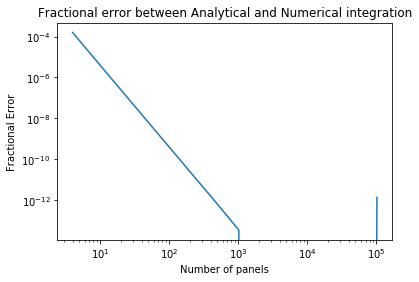

In [236]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 10240,102400] # Panel numbers to use
result_numeric = integrate_numeric(x0, x1, 4)
y_values = [(integrate_analytic(x0, x1) - integrate_numeric(x0,x1,4)) / integrate_analytic(x0,x1), (integrate_analytic(x0, x1) - integrate_numeric(x0,x1,8)) / integrate_analytic(x0,x1),(integrate_analytic(x0, x1) - integrate_numeric(x0,x1,16)) / integrate_analytic(x0,x1),(integrate_analytic(x0, x1) - integrate_numeric(x0,x1,32)) / integrate_analytic(x0,x1),(integrate_analytic(x0, x1) - integrate_numeric(x0,x1,64)) / integrate_analytic(x0,x1),(integrate_analytic(x0, x1) - integrate_numeric(x0,x1,128)) / integrate_analytic(x0,x1),(integrate_analytic(x0, x1) - integrate_numeric(x0,x1,256)) / integrate_analytic(x0,x1),(integrate_analytic(x0, x1) - integrate_numeric(x0,x1,512)) / integrate_analytic(x0,x1), (integrate_analytic(x0,x1) - integrate_numeric(x0,x1,1024)) / integrate_analytic(x0,x1),(integrate_analytic(x0,x1) - i]
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
plt.plot(panel_counts, y_values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of panels')
plt.ylabel('Fractional Error')
plt.title('Fractional error between Analytical and Numerical integration')

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Changing the number of panels increases the accuracy of the numerical method.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

If the trapezium rule was being used here instead of the simpsons rule then the panel count would affect the accuracy in the same way as the simpsons rule. The more panels used the more accurate the answer.